# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = pd.get_dummies(data[['rate_marriage','religious','educ','occupation','occupation_husb']], columns = ['rate_marriage','religious','educ','occupation','occupation_husb'])

In [6]:
X.head()

,rate_marriage_1.0,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0,educ_9.0,...,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [10]:
model.fit(X_train, Y_train)

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.6908511005714757, 0)
(0.08213155880258326, 0)
(0.30150349330489307, 0)
(0.14055331832671186, 0)
(0.332667967104502, 1)
(0.1066282126395346, 0)
(0.24529454817187962, 0)
(0.28694328885894166, 0)
(0.6586549518561317, 1)
(0.19313707982229514, 0)
(0.1134665098948803, 0)
(0.15663494717923895, 0)
(0.1134665098948803, 0)
(0.4324838492078107, 0)
(0.7540336485676364, 1)
(0.41571151096694964, 0)
(0.270921914302358, 0)
(0.6855319496482754, 1)
(0.23209150285011101, 0)
(0.13482262561595537, 0)
(0.21463928591387288, 1)
(0.41467529443060935, 1)
(0.1204492412158247, 1)
(0.44615126459409743, 1)
(0.26949242954585884, 0)
(0.1399508067835782, 0)
(0.4662288510641146, 0)
(0.26949242954585884, 0)
(0.36245881224292026, 0)
(0.0873070475077286, 0)
(0.18310265591925182, 0)
(0.36245881224292026, 1)
(0.22578981093192604, 0)
(0.641624723080109, 1)
(0.5337970538481235, 1)
(0.5337970538481235, 1)
(0.18802334475226046, 0)
(0.20866155763376967, 0)
(0.23481595717147963, 1)
(0.18996969839274694, 0)
(0.5454406503112684,

(0.27241477142010684, 0)
(0.36420409830806744, 0)
(0.4693512241697109, 1)
(0.652173933915635, 1)
(0.10943669883107031, 0)
(0.1677629877792153, 0)
(0.13962901682914078, 0)
(0.23050731120442478, 0)
(0.42034955122971257, 0)
(0.22758273553907776, 1)
(0.18310265591925182, 1)
(0.08813918798558044, 0)
(0.2510908747680021, 0)
(0.14055331832671186, 0)
(0.1826004630242424, 0)
(0.35585391336140354, 0)
(0.3482916102857199, 0)
(0.18926858041867736, 0)
(0.4424986512807892, 0)
(0.16042021454323946, 0)
(0.33241709098209127, 0)
(0.31014278452810246, 0)
(0.17352207906715164, 0)
(0.20618525100125393, 0)
(0.20709063770509123, 0)
(0.33434503403241966, 1)
(0.45547662284455953, 1)
(0.6148473640187271, 1)
(0.18310265591925182, 0)
(0.332667967104502, 0)
(0.5760890363589908, 0)
(0.6914909042872387, 1)
(0.21463928591387288, 0)
(0.32534952169767967, 0)
(0.22491753633153028, 0)
(0.5337970538481235, 1)
(0.31014278452810246, 0)
(0.10917616379516651, 0)
(0.20910377465747712, 0)
(0.2802083775643093, 1)
(0.462363405952

In [13]:
model.score(X_test, Y_test)

0.7146596858638743

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [15]:
result = {}
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model.fit(X_train, Y_train)
    a = model.score(X_test, Y_test)
    result = {i: a}
    print(result)

{0: 0.7146596858638743}
{1: 0.7240837696335078}
{2: 0.7109947643979058}
{3: 0.7172774869109948}
{4: 0.7104712041884816}
{5: 0.7293193717277487}
{6: 0.7094240837696335}
{7: 0.7261780104712042}
{8: 0.7109947643979058}
{9: 0.7136125654450262}


C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

### Оценка качества модели

Считаем accuracy последней модели

In [23]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [24]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7136125654450262

In [25]:
precision = tp / (tp + fp)
precision

0.550761421319797

### Используем готовые библиотеки

In [26]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [27]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [28]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.30732984293193716, 1.0, 0.04359701752091582)
(0.3069669984284966, 0.9982964224872232, 0.05140057938009713)
(0.30712788259958074, 0.9982964224872232, 0.059294662518131216)
(0.30761154855643047, 0.9982964224872232, 0.060461402478014716)
(0.3077731092436975, 0.9982964224872232, 0.06048528153625141)
(0.30793483972674723, 0.9982964224872232, 0.06227694367488885)
(0.3078947368421053, 0.9965928449744463, 0.0659311241821378)
(0.3080568720379147, 0.9965928449744463, 0.06607951805376912)
(0.3082191780821918, 0.9965928449744463, 0.06922263043879152)
(0.30785450711649975, 0.9948892674616695, 0.06970321565229919)
(0.3080168776371308, 0.9948892674616695, 0.07068418365873015)
(0.30817941952506595, 0.9948892674616695, 0.07135676545176078)
(0.3085050184891706, 0.9948892674616695, 0.07165139771692076)
(0.3081395348837209, 0.9931856899488927, 0.07239778794590578)
(0.30830248545742994, 0.9931856899488927, 0.0731682862579145)
(0.3086289041821069, 0.9931856899488927, 0.07341917031955217)
(0.3087923728813

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\doktor\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ValueError: x and y must have same first dimension, but have shapes (1,) and (728,)

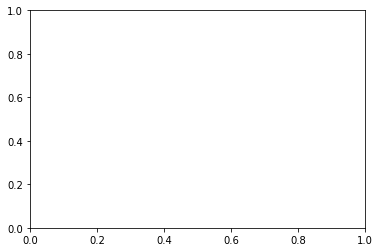

In [30]:
plt.plot( re, pr )

In [31]:
from sklearn.metrics import average_precision_score

In [32]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5078523050549997

### ROC

In [33]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [34]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [35]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.8821122217838757)
(0.0007558578987150416, 0.0, 0.8821122217838757)
(0.0007558578987150416, 0.005110732538330494, 0.8176118092792868)
(0.0007558578987150416, 0.008517887563884156, 0.8074923026754531)
(0.0007558578987150416, 0.01192504258943782, 0.8048312753546936)
(0.0015117157974300832, 0.01192504258943782, 0.8024467267166395)
(0.0015117157974300832, 0.018739352640545145, 0.7726679759473171)
(0.0030234315948601664, 0.018739352640545145, 0.7634266523291894)
(0.0045351473922902496, 0.022146507666098807, 0.7614022174203593)
(0.005291005291005291, 0.022146507666098807, 0.7584601296160776)
(0.006046863189720333, 0.02555366269165247, 0.7576715070216664)
(0.006046863189720333, 0.03236797274275979, 0.7504686722322649)
(0.006046863189720333, 0.039182282793867124, 0.7441315160327118)
(0.006802721088435374, 0.04088586030664395, 0.7412437792232466)
(0.008314436885865457, 0.04088586030664395, 0.734057439887255)
(0.008314436885865457, 0.044293015332197615, 0.7310970926624888)
(0.0090702

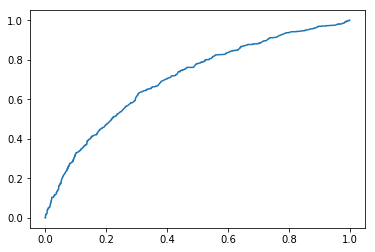

In [36]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [37]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

KeyError: "None of [['age', 'children']] are in the [columns]"

In [38]:
model2 = LogisticRegression()

In [39]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

NameError: name 'Xshort' is not defined

In [40]:
model2.fit( X_train_short, Y_train )

NameError: name 'X_train_short' is not defined

In [ ]:
predictions2 = model2.predict_proba( X_test_short )

In [ ]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7034635546438905

In [43]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6975557590062336

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [44]:
from sklearn.metrics import auc

In [45]:
auc( fpr, tpr )

0.7034635546438905

In [46]:
auc( fpr2, tpr2 )

0.6975557590062336

## Пример влияния L1 и L2-регуляризации

In [16]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

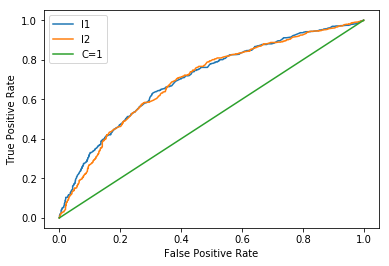

In [47]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [48]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [49]:
Y = data['affair']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [55]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 0.001 ).fit( X_train, Y_train )

C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\doktor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [57]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

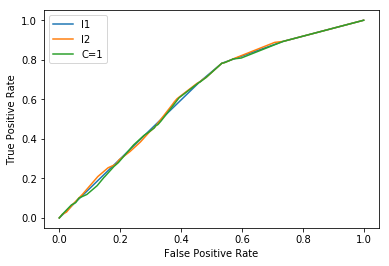

In [58]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()